In [1]:
import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

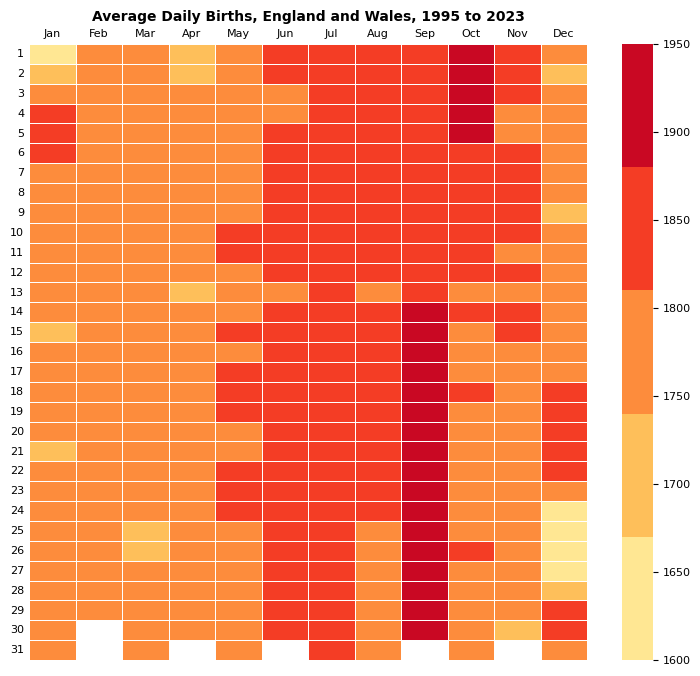

In [2]:
df = pd.read_csv('daily-births.csv')

df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

df[['Day', 'Month']] = df['Date'].str.split("/", expand=True).astype(int)

df.drop(columns=['Date'], inplace=True)

melted = df.melt(id_vars=['Day', 'Month'], var_name='Year', value_name='Births')

melted['Year'] = melted['Year'].astype(int)

melted["Births"] = pd.to_numeric(melted["Births"], errors="coerce")

avg = melted.groupby(['Month', 'Day'])['Births'].mean().unstack()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

correct_avg = avg.T

color_bins = [1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950]  

cmap = sns.color_palette("YlOrRd", len(color_bins) - 3)  

plt.figure(figsize=(9, 8))

ax = sns.heatmap(correct_avg, cmap=cmap, linewidths=0.5, cbar=True, vmin=1600, vmax=1950, 
                 cbar_kws={'ticks': color_bins, 'spacing': 'proportional'}, xticklabels=months, yticklabels=True)

plt.title("Average Daily Births, England and Wales, 1995 to 2023", fontsize=10, fontweight="bold")
plt.xlabel("")
plt.ylabel("")

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.xticks(rotation=0, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
ax.figure.axes[-1].yaxis.set_tick_params(labelsize=8)

plt.tick_params(axis='both', which='both', length=0)

plt.show()